# Requirements

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=70f6340cbed8946b28c25c28020725f38f1de7dc6cee0b04b7830e0413859036
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
pip install SQLAlchemy==1.4.46

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10


We are loading the necessary libraries for processing SQL queries in Jupyter Notebook. The most important thing is to install a specific version of SQLAlchemy and restart the runtime, otherwise, nothing will work.

In [ ]:
from pandasql import sqldf

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Loading and describing the data

First, I will separate all the tables from the file into individual dataframes.

In [ ]:
SHOPS = pd.read_excel('Тестовое_задание_Специалист_по_анализу_данных.xlsx', \
                      sheet_name='Задание на знание SQL', \
                   skiprows=20, usecols="B:D", nrows=17)

SHOPS

,SHOPNUMBER,CITY,ADDRESS
0,1,СПб,"Ленина, 5"
1,2,МСК,"Пушкина, 10"
2,3,НВГ,"Ленина, 10"
3,4,МСК,"Лермонтова, 12"
4,5,НВГ,"Иванова, 56"
5,6,СПб,"Стачек, 125"
6,7,СПб,"Ветеранов, 105"
7,8,СПб,"Зеленина, 12"
8,9,МСК,"Центральная, 128"
9,10,НВГ,"Лермонтова, 18"


In [ ]:
SHOPS.dtypes

SHOPNUMBER     int64
CITY          object
ADDRESS       object
dtype: object

In [ ]:
GOODS = pd.read_excel('Тестовое_задание_Специалист_по_анализу_данных.xlsx', \
                      sheet_name='Задание на знание SQL', \
                   skiprows=20, usecols="F:I", nrows=15)

GOODS

,ID_GOOD,CATEGORY,GOOD_NAME,PRICE
0,1234567,КРАСОТА,шамунь,100
1,1234568,ЧИСТОТА,стиральный порошок,120
2,1234569,ЧИСТОТА,чистящее средство,50
3,1234570,ЧИСТОТА,средство для мытья посуды,30
4,1234571,ДЕКОР,резинка для волос,20
5,1234572,ДЕКОР,тушь для ресниц,300
6,1234573,ДЕКОР,помада,200
7,1234574,ДЕКОР,подарочный пакет,100
8,1234575,КРАСОТА,мыло,10
9,1234576,ДЕКОР,лак для ногтей,120


In [ ]:
GOODS.dtypes

ID_GOOD       int64
CATEGORY     object
GOOD_NAME    object
PRICE         int64
dtype: object

In [ ]:
SALES = pd.read_excel('Тестовое_задание_Специалист_по_анализу_данных.xlsx', \
                      sheet_name='Задание на знание SQL', \
                   skiprows=40, usecols="B:E", nrows=307)

SALES

,DATE,SHOPNUMBER,ID_GOOD,QTY
0,2016-01-01,1,1234569,100
1,2016-01-01,1,1234570,200
2,2016-01-01,1,1234571,300
3,2016-01-01,1,1234572,400
4,2016-01-01,1,1234573,500
...,...,...,...,...
301,2016-01-03,16,1234576,200
302,2016-01-03,16,1234577,300
303,2016-01-03,16,1234578,400
304,2016-01-03,16,1234579,500


In [ ]:
SALES['DATE'] = SALES['DATE'].dt.strftime('%d/%m/%Y')

In [ ]:
SALES.head()

,DATE,SHOPNUMBER,ID_GOOD,QTY
0,01/01/2016,1,1234569,100
1,01/01/2016,1,1234570,200
2,01/01/2016,1,1234571,300
3,01/01/2016,1,1234572,400
4,01/01/2016,1,1234573,500


I will change the date format to day/month/year.

In [ ]:
SALES.dtypes

DATE          object
SHOPNUMBER     int64
ID_GOOD        int64
QTY            int64
dtype: object

# Assignment on SQL knowledge.

## 1. It is necessary to retrieve all possible combinations of store-product (without using the SALES table)

In [ ]:
SQL1 = sqldf("""

  SELECT 
    S.SHOPNUMBER, 
    S.CITY, 
    G.ID_GOOD, 
    G.CATEGORY
  FROM 
    SHOPS AS S
  CROSS JOIN 
    GOODS AS G

  """)
SQL1

,SHOPNUMBER,CITY,ID_GOOD,CATEGORY
0,1,СПб,1234567,КРАСОТА
1,1,СПб,1234568,ЧИСТОТА
2,1,СПб,1234569,ЧИСТОТА
3,1,СПб,1234570,ЧИСТОТА
4,1,СПб,1234571,ДЕКОР
...,...,...,...,...
235,16,МРМ,1234577,ДЕКОР
236,16,МРМ,1234578,КРАСОТА
237,16,МРМ,1234579,КРАСОТА
238,16,МРМ,1234580,КРАСОТА


## 2. Condition: selection based on sales for January 2, 2016

In [ ]:
SQL2 = sqldf("""

  SELECT 
    SH.SHOPNUMBER, 
    SH.CITY, 
    SH.ADDRESS, 
    SUM(SA.QTY) AS SUM_QTY, 
    SUM(G.PRICE * SA.QTY) AS SUM_PRICE
  FROM 
    SHOPS AS SH
  INNER JOIN 
    SALES AS SA 
    ON SA.SHOPNUMBER = SH.SHOPNUMBER
  INNER JOIN 
    GOODS AS G 
    ON SA.ID_GOOD = G.ID_GOOD
  WHERE 
    SA.DATE = '02/01/2016'
  GROUP BY 
    1, 2, 3

  """)
SQL2

,SHOPNUMBER,CITY,ADDRESS,SUM_QTY,SUM_PRICE
0,1,СПб,"Ленина, 5",690,49650
1,2,МСК,"Пушкина, 10",1530,230200
2,3,НВГ,"Ленина, 10",3900,340500
3,4,МСК,"Лермонтова, 12",2380,224450
4,5,НВГ,"Иванова, 56",1995,148600
5,6,СПб,"Стачек, 125",4000,552000
6,7,СПб,"Ветеранов, 105",1620,150450
7,8,СПб,"Зеленина, 12",1255,189750
8,9,МСК,"Центральная, 128",5070,461825
9,10,НВГ,"Лермонтова, 18",2305,257050


## 3. Condition: selection only for products of the category 'CLEANLINESS'

In [ ]:
SQL3 = sqldf("""

  SELECT 
    SA.DATE, 
    SH.CITY, 
    SUM(G.PRICE * SA.QTY) AS SHARE_RUB
  FROM 
    SHOPS AS SH
  INNER JOIN 
    SALES AS SA 
    ON SA.SHOPNUMBER = SH.SHOPNUMBER
  INNER JOIN 
    GOODS AS G 
    ON SA.ID_GOOD = G.ID_GOOD
  WHERE 
    G.CATEGORY = 'ЧИСТОТА'
  GROUP BY 
    1, 2
  ORDER BY 
    DATE

  """)
SQL3

,DATE,CITY,SHARE_RUB
0,01/01/2016,МРМ,46575
1,01/01/2016,МСК,24825
2,01/01/2016,НВГ,49650
3,01/01/2016,СПб,342850
4,02/01/2016,МРМ,44700
5,02/01/2016,МСК,166425
6,02/01/2016,НВГ,209350
7,02/01/2016,СПб,275450
8,03/01/2016,МРМ,14850
9,03/01/2016,МСК,32325


## 4. Condition: information about the top 3 products by sales quantity in each store on each date

In [ ]:
SQL4 = sqldf("""

  WITH CTE AS
    (
      SELECT 
        SA.DATE, 
        SA.SHOPNUMBER, 
        SA.ID_GOOD, 
        SUM(SA.QTY) AS TOTAL_QTY
      FROM 
        SALES AS SA
      GROUP BY 
        1, 2
      ORDER BY 
        SA.SHOPNUMBER, 
        TOTAL_QTY DESC
    )
  SELECT 
    DATE, 
    SHOPNUMBER, 
    ID_GOOD
  FROM 
    CTE

  """)
SQL4

,DATE,SHOPNUMBER,ID_GOOD
0,01/01/2016,1,1234569
1,03/01/2016,1,1234570
2,02/01/2016,1,1234567
3,03/01/2016,2,1234576
4,01/01/2016,2,1234577
5,02/01/2016,2,1234571
6,02/01/2016,3,1234578
7,03/01/2016,3,1234568
8,01/01/2016,3,1234571
9,01/01/2016,4,1234575


## 5. Condition: only stores in St. Petersburg

In [ ]:
SQL5 = sqldf("""

  WITH CTE AS
    (
      SELECT 
        SA.DATE, 
        SA.SHOPNUMBER, 
        G.CATEGORY, 
        SUM(G.PRICE * SA.QTY) AS SUMM
      FROM 
        SALES AS SA
      INNER JOIN 
        GOODS AS G 
        ON G.ID_GOOD = SA.ID_GOOD
      INNER JOIN 
        SHOPS AS SH 
        ON SH.SHOPNUMBER = SA.SHOPNUMBER
      WHERE 
        SH.CITY = 'СПб'
      GROUP BY 
        1, 2, 3
    )
  SELECT 
    DATE, 
    SHOPNUMBER, 
    CATEGORY, 
    LAG(SUMM, 1) OVER (PARTITION BY SHOPNUMBER, 
    CATEGORY ORDER BY DATE) AS SUM_PREV_DATE
  FROM 
    CTE
  ORDER BY 
    DATE ASC, 
    SHOPNUMBER ASC, 
    CATEGORY ASC

  """)
SQL5

,DATE,SHOPNUMBER,CATEGORY,SUM_PREV_DATE
0,01/01/2016,1,ДЕКОР,NaN
1,01/01/2016,1,КРАСОТА,NaN
2,01/01/2016,1,ЧИСТОТА,NaN
3,01/01/2016,6,ДЕКОР,NaN
4,01/01/2016,6,КРАСОТА,NaN
5,01/01/2016,6,ЧИСТОТА,NaN
6,01/01/2016,7,ДЕКОР,NaN
7,01/01/2016,7,КРАСОТА,NaN
8,01/01/2016,8,ДЕКОР,NaN
9,01/01/2016,8,КРАСОТА,NaN


# Задание на очистку данных

In [4]:
df = pd.read_excel('Тестовое_задание_Специалист_по_анализу_данных.xlsx', \
                      sheet_name='Данные для очистки')

df

,Дата,Продажи в штуках
0,2020-01-01,0
1,2020-01-02,3502
2,2020-01-03,3664
3,2020-01-04,3727
4,2020-01-05,3889
...,...,...
877,2022-05-27,5074
878,2022-05-28,5307
879,2022-05-29,5201
880,2022-05-30,5090


In [ ]:
df.dtypes

Дата                datetime64[ns]
Продажи в штуках             int64
dtype: object

## Checking the dataset for duplicate entries

In [5]:
df[df.duplicated(keep=False)]

,Дата,Продажи в штуках


Conclusion: No duplicates found

## Searching for missing data

In [ ]:
df[df.isna().any(axis=1)]

,Дата,Продажи в штуках


In [ ]:
df[df.isnull().any(axis=1)]

,Дата,Продажи в штуках


Let's find zero values in the second column (Values represented as dashes in the xlsx format are converted to zeros by Pandas)

In [ ]:
df.loc[df['Дата'] == 0]

,Дата,Продажи в штуках


In [ ]:
df.loc[df['Продажи в штуках'] == 0]

,Дата,Продажи в штуках
0,2020-01-01,0
31,2020-02-01,0
32,2020-02-02,0
285,2020-10-12,0
286,2020-10-13,0
287,2020-10-14,0
288,2020-10-15,0
289,2020-10-16,0
290,2020-10-17,0
291,2020-10-18,0


Empty values found. It is not possible to assert that there were no sales on those days, so I will fill in such gaps.

## Checking for anomalies and outliers

To check the dataset for anomalies and outliers, I will use a boxplot, dividing the sample by months.

<Axes: xlabel='Месяц и год', ylabel='Продажи в штуках'>

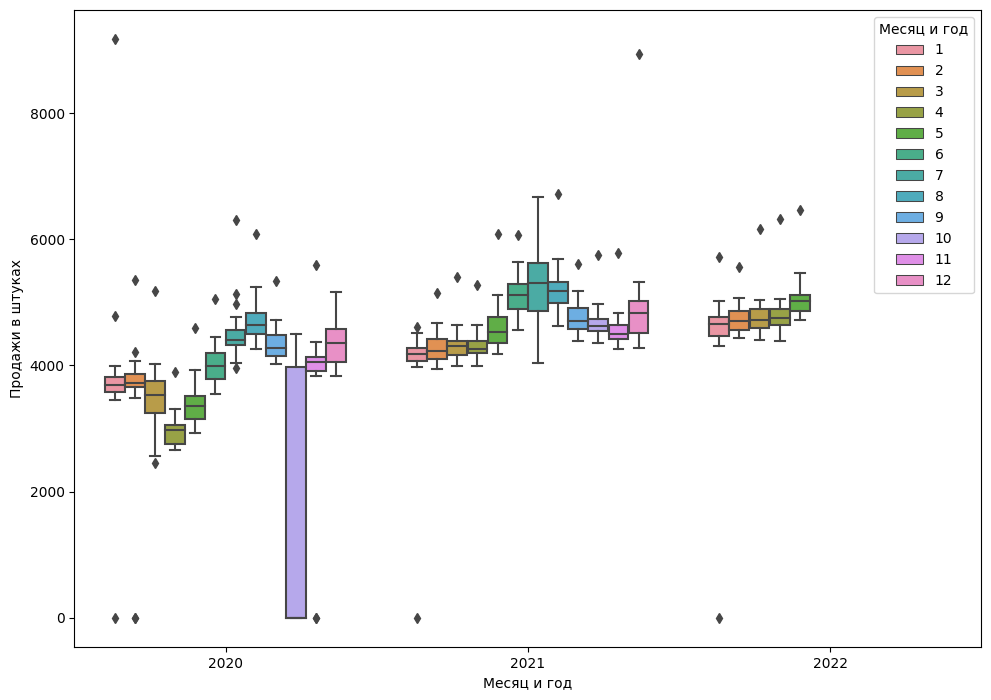

In [5]:
df['Месяц и год'] = df['Дата'].dt.to_period('M')


fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.boxplot(x = df['Месяц и год'].dt.year, y = df['Продажи в штуках'],\
            hue = df['Месяц и год'].dt.month)

The resulting plot clearly reveals some patterns in revenue, and anomalies are also noticeable, such as in January 2020 and December 2021.

## Data processing

I will replace zero values with the mean values for the respective months where these values are missing. The majority of data for October 2020 will be filled with the mean value and a slightly increased standard deviation. Thus, empty values will not be static and will deviate from the mean.

In [6]:
df = df.replace(0, np.nan)

sales_mean_std = df.groupby('Месяц и год')['Продажи в штуках'].agg(['mean', 'std'])

def fill_sales(row, std_multiplier):
    month_year = row['Месяц и год']
    sales = row['Продажи в штуках']
    if pd.isnull(sales):
        mean = sales_mean_std.loc[month_year, 'mean']
        std = sales_mean_std.loc[month_year, 'std']
        sales = np.random.normal(mean, std*std_multiplier)
    return sales

df['Продажи в штуках'] = df.apply(lambda x: fill_sales(x, std_multiplier=1.5), axis=1)

df['Продажи в штуках'] = df['Продажи в штуках'].apply(np.floor)

df

,Дата,Продажи в штуках,Месяц и год
0,2020-01-01,3747.0,2020-01
1,2020-01-02,3502.0,2020-01
2,2020-01-03,3664.0,2020-01
3,2020-01-04,3727.0,2020-01
4,2020-01-05,3889.0,2020-01
...,...,...,...
877,2022-05-27,5074.0,2022-05
878,2022-05-28,5307.0,2022-05
879,2022-05-29,5201.0,2022-05
880,2022-05-30,5090.0,2022-05


Let's take a closer look at October 2020. In this month, there were the most missing values, but now we have replaced them with a deviation from the mean, preserving some logic in the sales.

In [8]:
df.loc[df['Месяц и год'] >= '2020-10'].head(30)

,Дата,Продажи в штуках,Месяц и год
274,2020-10-01,4032.0,2020-10
275,2020-10-02,3845.0,2020-10
276,2020-10-03,4216.0,2020-10
277,2020-10-04,4268.0,2020-10
278,2020-10-05,3997.0,2020-10
279,2020-10-06,3810.0,2020-10
280,2020-10-07,4008.0,2020-10
281,2020-10-08,4155.0,2020-10
282,2020-10-09,3953.0,2020-10
283,2020-10-10,4371.0,2020-10


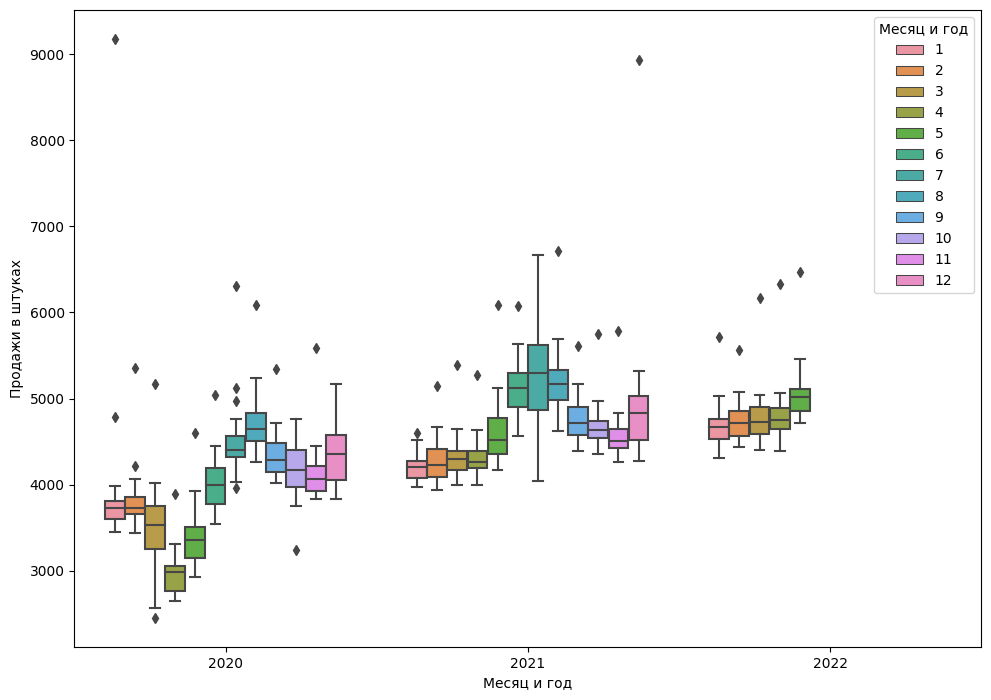

In [7]:
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.boxplot(x = df['Месяц и год'].dt.year, y = df['Продажи в штуках'],\
            hue = df['Месяц и год'].dt.month)
plt.show()

After significant changes in filling empty cells, I managed to achieve a decent model. I filled a large gap in the data for October 2020, but there are still outliers. Let's process such values.

The two rows with sales figures of 9176 and 8932 stand out too much compared to other outliers. These outliers are too apparent, forming during periods that did not bring high average sales. Therefore, I will manually adjust these values. There are not so many of them. Deleting such values is not advisable, considering that our existing reporting contains daily sales figures.

In [35]:
df.loc[df['Продажи в штуках'] > 8000]

,Дата,Продажи в штуках,Месяц и год
24,2020-01-25,9176.0,2020-01
714,2021-12-15,8932.0,2021-12


In [36]:
df.loc[df['Продажи в штуках'] < 2000]

,Дата,Продажи в штуках,Месяц и год


In [9]:
df.at[24, 'Продажи в штуках'] /= 2.4
df.at[714, 'Продажи в штуках'] /= 1.7

The final version for submitting the technical task looked like this:

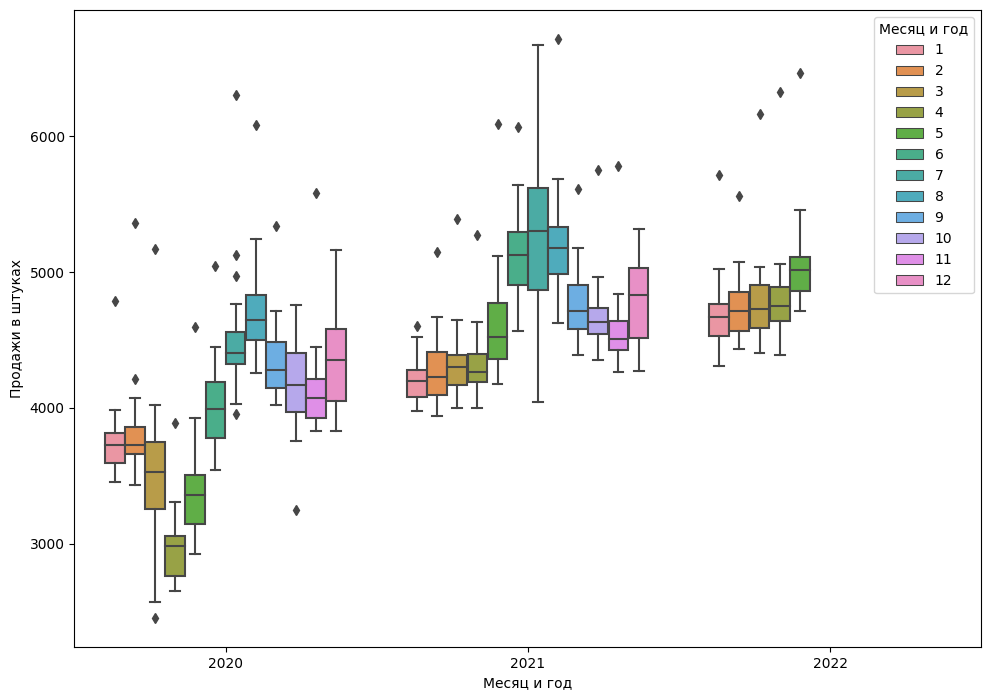

In [25]:
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.boxplot(x = df['Месяц и год'].dt.year, y = df['Продажи в штуках'],\
            hue = df['Месяц и год'].dt.month)
plt.show()

After receiving feedback on my work, I decided to improve the analysis of anomalies in the data. For a deeper analysis, I chose to turn to CNN (Convolutional Neural Network) and, at the same time, used one of the common architectures for this task - LSTM Autoencoder, which will help us detect anomalies.

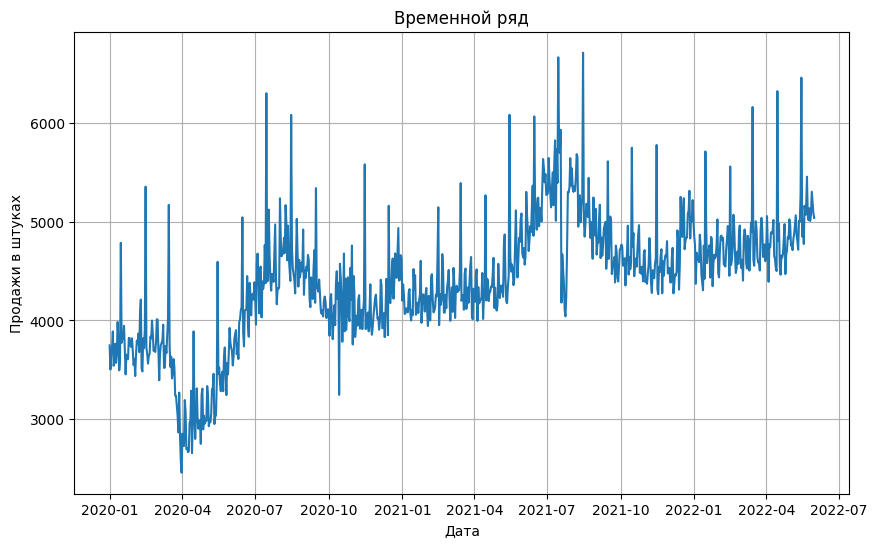

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['Дата'], df['Продажи в штуках'])
plt.xlabel('Дата')
plt.ylabel('Продажи в штуках')
plt.title('Временной ряд')
plt.grid(True)
plt.show()

28/28 [==============================] - 0s 2ms/step


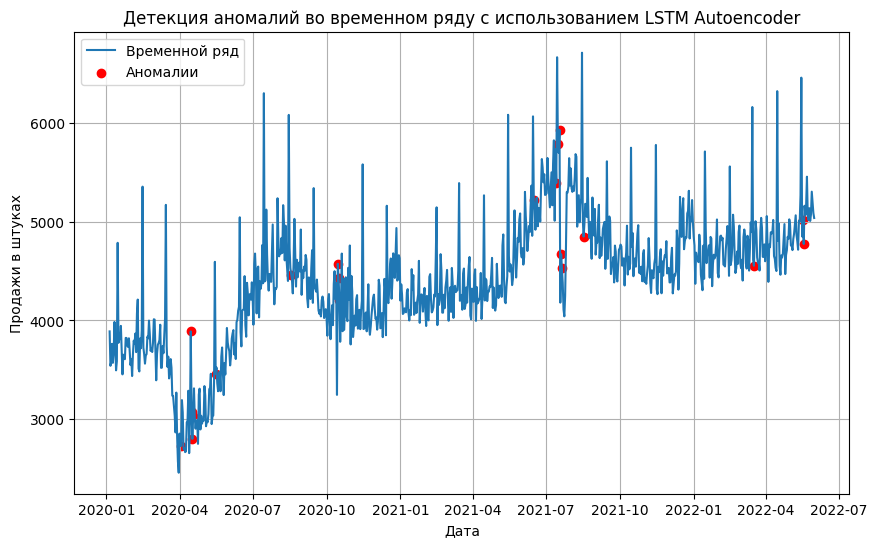

In [17]:
sequence_length = 4
X = []
for i in range(len(df) - sequence_length + 1):
    X.append(df['Продажи в штуках'].values[i:i+sequence_length])
X = np.array(X)

X_normalized = (X - np.mean(X)) / np.std(X)

model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model.add(LSTM(16, activation='relu', return_sequences=False))
model.add(Dense(sequence_length, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_normalized, X_normalized, epochs=100, batch_size=16, verbose=0)

X_pred = model.predict(X_normalized)
reconstruction_error = np.mean(np.square(X_pred - X_normalized), axis=1)

threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)

anomalies = df['Дата'][sequence_length-1:][reconstruction_error > threshold]

plt.figure(figsize=(10, 6))
plt.plot(df['Дата'][sequence_length:], df['Продажи в штуках'][sequence_length:], label='Временной ряд')

anomaly_dates = [date for date in anomalies if date in df['Дата'].values]
anomaly_values = df.loc[df['Дата'].isin(anomaly_dates), 'Продажи в штуках']
plt.scatter(df['Дата'].loc[df['Дата'].isin(anomaly_dates)], anomaly_values, color='red', label='Аномалии')

plt.xlabel('Дата')
plt.ylabel('Продажи в штуках')
plt.title('Детекция аномалий во временном ряду с использованием LSTM Autoencoder')
plt.legend()
plt.grid(True)
plt.show()

## Результат

I replace the detected anomalous values with values from one step back in the dataframe. This way, I have eliminated anomalous points in the dataset. In my opinion, the data now remains clean.

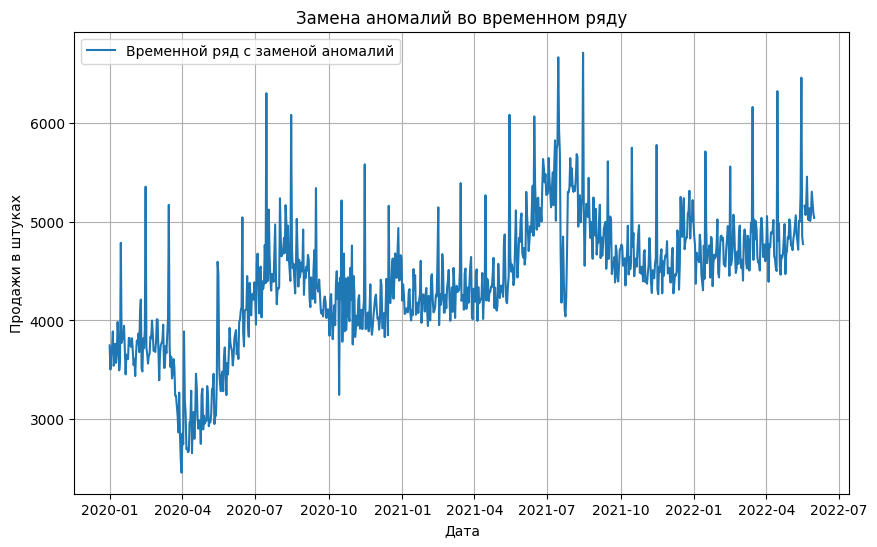

In [23]:
df_cleaned = df.copy()

replacement_value = df_cleaned.loc[df_cleaned['Дата'].isin(anomaly_dates), 'Продажи в штуках'].shift(-1)
df_cleaned.loc[df_cleaned['Дата'].isin(anomaly_dates), 'Продажи в штуках'] = replacement_value

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Дата'], df_cleaned['Продажи в штуках'], label='Временной ряд с заменой аномалий')
plt.xlabel('Дата')
plt.ylabel('Продажи в штуках')
plt.title('Замена аномалий во временном ряду')
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Месяц и год', ylabel='Продажи в штуках'>

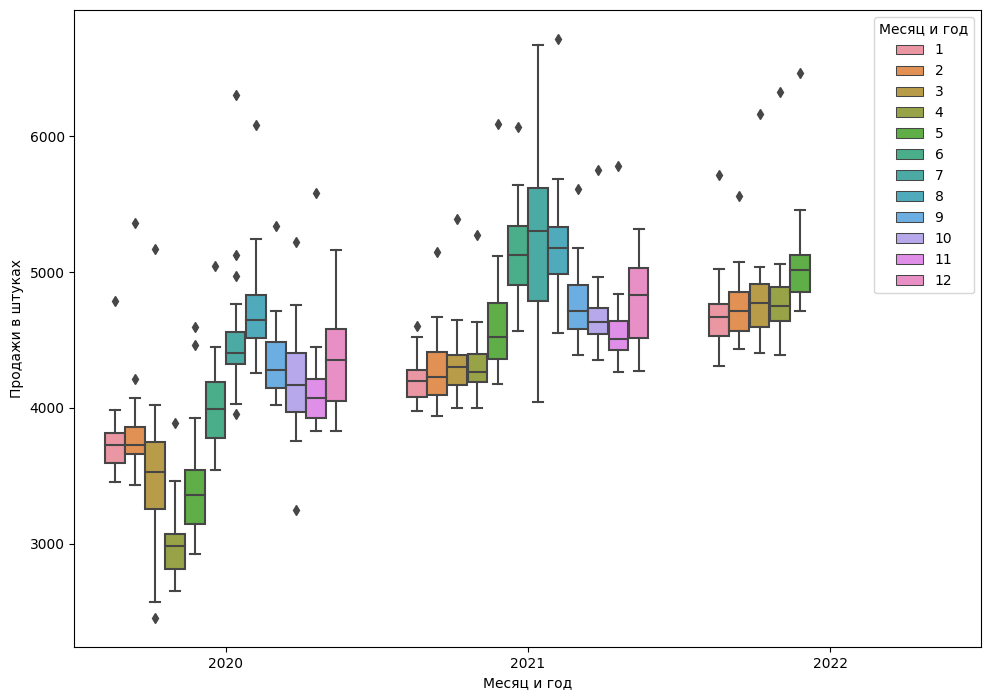

In [24]:
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.boxplot(x = df_cleaned['Месяц и год'].dt.year, y = df_cleaned['Продажи в штуках'],\
            hue = df_cleaned['Месяц и год'].dt.month)

The remaining values, in my opinion, remain within the normal range. I won't make changes to them. So, I have cleaned the data, removed outliers, filled gaps considering patterns, checked for duplicates, and visualized the results.

In [ ]:
df.to_csv(r'путь в файл', index= False )

We export the dataset.